In [ ]:
!pip install yfinance
import math
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import yfinance as yfin
yfin.pdr_override()
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#get the stock quote
df = web.get_data_yahoo('^GSPC',start='2020-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000
...,...,...,...,...,...,...
2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4081.500000,4270200000
2023-02-10,4068.919922,4094.360107,4060.790039,4090.459961,4090.459961,3891520000
2023-02-13,4096.620117,4138.899902,4092.669922,4137.290039,4137.290039,3448620000


In [ ]:
df.shape

(787, 6)

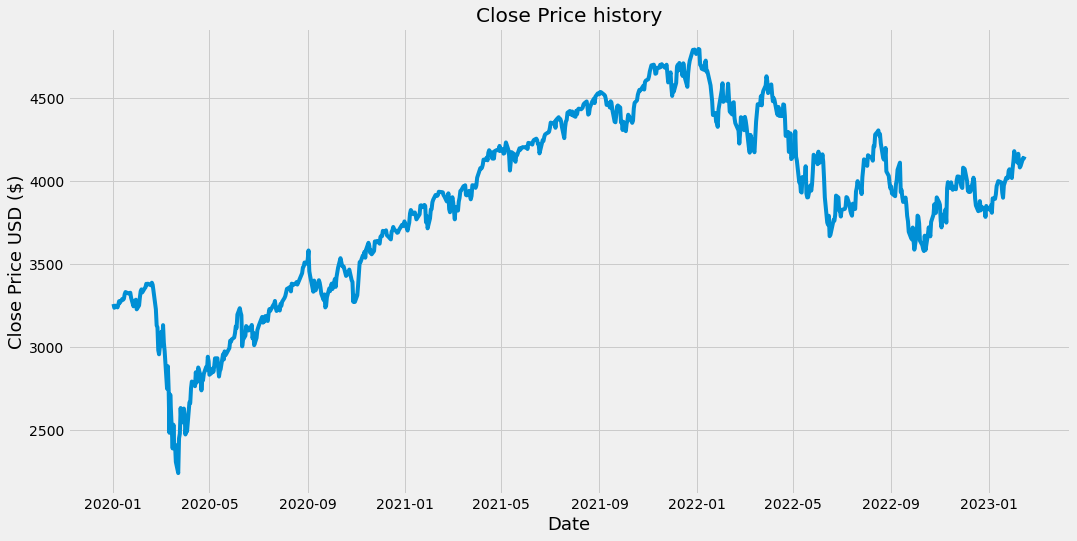

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#create a new dataframe with only the "close column"
data = df.filter(['Close'])
dataset=data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len
data

,Close
Date,
2020-01-02,3257.850098
2020-01-03,3234.850098
2020-01-06,3246.280029
2020-01-07,3237.179932
2020-01-08,3253.050049
...,...
2023-02-09,4081.500000
2023-02-10,4090.459961
2023-02-13,4137.290039


In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)

scaled_data

array([[0.39874417],
       [0.38975685],
       [0.39422313],
       [0.39066724],
       [0.39686854],
       [0.40532831],
       [0.40167482],
       [0.41057609],
       [0.40863015],
       [0.41102943],
       [0.42178296],
       [0.42678854],
       [0.42333815],
       [0.42371326],
       [0.42519423],
       [0.41344426],
       [0.39318758],
       [0.40593008],
       [0.40482031],
       [0.40882944],
       [0.38611109],
       [0.39525468],
       [0.4142727 ],
       [0.42876959],
       [0.43310307],
       [0.42604214],
       [0.43556875],
       [0.43778038],
       [0.4462597 ],
       [0.44410665],
       [0.44653712],
       [0.44268044],
       [0.44887773],
       [0.44382923],
       [0.42996531],
       [0.38625562],
       [0.34808687],
       [0.34346814],
       [0.28968883],
       [0.28009973],
       [0.33324608],
       [0.29930531],
       [0.34883327],
       [0.30734303],
       [0.28719196],
       [0.19895596],
       [0.25196941],
       [0.196

In [ ]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.39874417, 0.38975685, 0.39422313, 0.39066724, 0.39686854,
       0.40532831, 0.40167482, 0.41057609, 0.40863015, 0.41102943,
       0.42178296, 0.42678854, 0.42333815, 0.42371326, 0.42519423,
       0.41344426, 0.39318758, 0.40593008, 0.40482031, 0.40882944,
       0.38611109, 0.39525468, 0.4142727 , 0.42876959, 0.43310307,
       0.42604214, 0.43556875, 0.43778038, 0.4462597 , 0.44410665,
       0.44653712, 0.44268044, 0.44887773, 0.44382923, 0.42996531,
       0.38625562, 0.34808687, 0.34346814, 0.28968883, 0.28009973,
       0.33324608, 0.29930531, 0.34883327, 0.30734303, 0.28719196,
       0.19895596, 0.25196941, 0.19693179, 0.0950468 , 0.18506857,
       0.05811671, 0.11401789, 0.06279411, 0.06720564, 0.02638366,
       0.        , 0.08203089, 0.09306184, 0.15343712, 0.11881635])]
[0.15210068000213695]

[array([0.39874417, 0.38975685, 0.39422313, 0.39066724, 0.39686854,
       0.40532831, 0.40167482, 0.41057609, 0.40863015, 0.41102943,
       0.42178296, 0.42678854, 0.42

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(570, 60)

In [ ]:
#reshape the data
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(570, 60, 1)

In [ ]:
#build the model
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=64,epochs=44)

Epoch 1/44
9/9 [==============================] - 6s 171ms/step - loss: 0.1286
Epoch 2/44
9/9 [==============================] - 3s 342ms/step - loss: 0.0194
Epoch 3/44
9/9 [==============================] - 4s 413ms/step - loss: 0.0081
Epoch 4/44
9/9 [==============================] - 3s 306ms/step - loss: 0.0054
Epoch 5/44
9/9 [==============================] - 3s 338ms/step - loss: 0.0033
Epoch 6/44
9/9 [==============================] - 3s 319ms/step - loss: 0.0025
Epoch 7/44
9/9 [==============================] - 4s 455ms/step - loss: 0.0020
Epoch 8/44
9/9 [==============================] - 3s 311ms/step - loss: 0.0016
Epoch 9/44
9/9 [==============================] - 3s 326ms/step - loss: 0.0014
Epoch 10/44
9/9 [==============================] - 3s 324ms/step - loss: 0.0013
Epoch 11/44
9/9 [==============================] - 4s 484ms/step - loss: 0.0013
Epoch 12/44
9/9 [==============================] - 3s 292ms/step - loss: 0.0013
Epoch 13/44
9/9 [==============================] 

In [ ]:
#create the testing data set
#create a new array containing scaled values from index x_train.shape[0] to df[0]
test_data = scaled_data[training_data_len-60:,:]
#create the data sets x_test and y_test
x_test =[]
y_test =dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
#convert the data into numpy array
x_test= np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 76ms/step


In [ ]:
#from sklearn.metrics import mean_squared_error
#get the root mean square error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse
#rmse = mean_squared_error(y_test,predictions)
#rmse

13.828176316182326

<ipython-input-49-c790f42b737a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


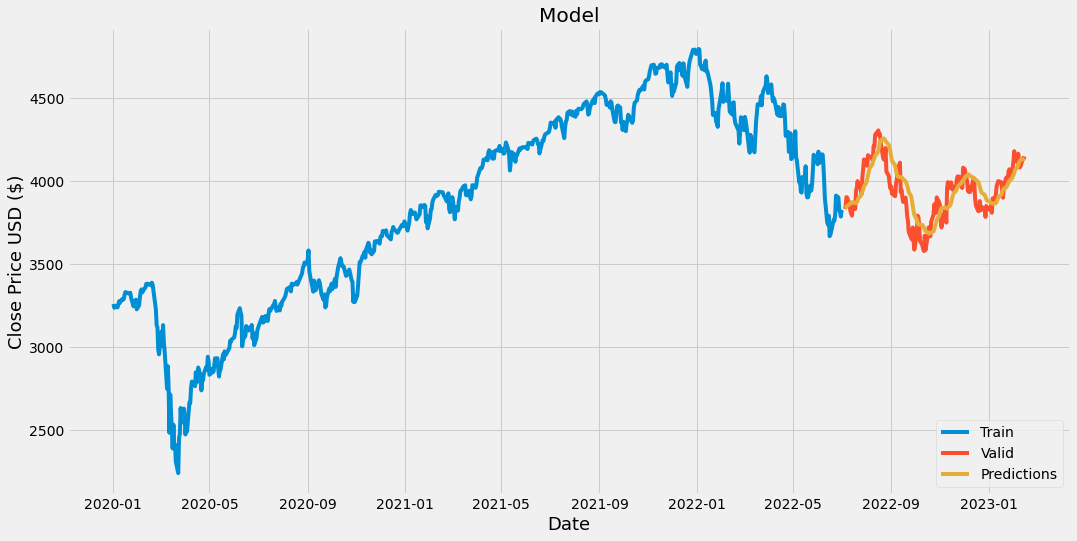

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show the valid and predicton prices
valid

,Close,Predictions
Date,,
2022-07-05,3831.389893,3836.993164
2022-07-06,3845.080078,3839.542969
2022-07-07,3902.620117,3843.195801
2022-07-08,3899.379883,3850.555176
2022-07-11,3854.429932,3859.757568
...,...,...
2023-02-09,4081.500000,4121.563477
2023-02-10,4090.459961,4127.497559
2023-02-13,4137.290039,4130.387207


In [ ]:
len(test_data)

217

In [ ]:
x_input=test_data[117:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.5688702500973066,
 0.5539474085889382,
 0.5509190713506169,
 0.5789556128795914,
 0.5482541078692502,
 0.5268213525250134,
 0.5630870837753474,
 0.6070468178800112,
 0.6040575941203854,
 0.5889119965809095,
 0.5479375748880018,
 0.5372817277091331,
 0.5280795663555395,
 0.5234647482618351,
 0.5597578589472558,
 0.5258249128055621,
 0.5628995298750656,
 0.5793228979844156,
 0.5696243770463028,
 0.5581440940555145,
 0.5921278877195124,
 0.6095516068961833,
 0.6336884392004822,
 0.6225480618794312,
 0.6134434934251196,
 0.6500805165268757,
 0.638717383174717,
 0.6325122682764883,
 0.5948396919765853,
 0.5792876958535895,
 0.5990833136175959,
 0.6132481168290989,
 0.621575090247197,
 0.5904945660884231,
 0.6716930984743834,
 0.6859789626723853,
 0.6720369154919903,
 0.6855100779216814,
 0.6726386906715307,
 0.667859786764762,
 0.6751981431591478,
 0.6691804867624724,
 0.690140541406864,
 0.6993935502827617,
 0.6989481336192751,
 0.6746510314510528,
 0.6721853559135762,
 0.72004489464164

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<28):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.74373496]
101
1 day input [0.55394741 0.55091907 0.57895561 0.54825411 0.52682135 0.56308708
 0.60704682 0.60405759 0.588912   0.54793757 0.53728173 0.52807957
 0.52346475 0.55975786 0.52582491 0.56289953 0.5793229  0.56962438
 0.55814409 0.59212789 0.60955161 0.63368844 0.62254806 0.61344349
 0.65008052 0.63871738 0.63251227 0.59483969 0.5792877  0.59908331
 0.61324812 0.62157509 0.59049457 0.6716931  0.68597896 0.67203692
 0.68551008 0.67263869 0.66785979 0.67519814 0.66918049 0.69014054
 0.69939355 0.69894813 0.67465103 0.67218536 0.72004489 0.71866161
 0.7167586  0.68828838 0.66578878 0.66292061 0.67448303 0.66310034
 0.68505293 0.69641988 0.68691292 0.64800559 0.63105086 0.61749164
 0.61903911 0.64124163 0.6193399  0.62810456 0.62202051 0.60403413
 0.6298473  0.62602573 0.62002372 0.63128916 0.61375612 0.64774382
 0.64657547 0.65718829 0.67686667 0.68216521 0.68838606 0.6852131
 0.66094347 0.64921697 0.67803893 0.69648246 0.69536486 0.69507962
 0.7123548  0.71631318 0.69568531 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,129)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(scaled_data)

787

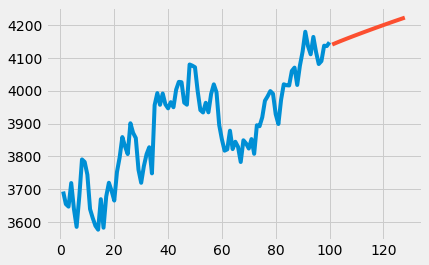

In [ ]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[687:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
my_test = scaler.inverse_transform(lst_output)
my_test

array([[4140.73676801],
       [4144.27351018],
       [4147.68151042],
       [4151.00027603],
       [4154.2563486 ],
       [4157.46528697],
       [4160.63868403],
       [4163.78355651],
       [4166.90402294],
       [4170.00206631],
       [4173.0804323 ],
       [4176.13973106],
       [4179.18087781],
       [4182.20433018],
       [4185.20993563],
       [4188.19860937],
       [4191.17019887],
       [4194.12531429],
       [4197.06410817],
       [4199.98642795],
       [4202.89227365],
       [4205.78256049],
       [4208.6569834 ],
       [4211.5152373 ],
       [4214.35808487],
       [4217.18552613],
       [4219.99740852],
       [4222.79357952]])

In [ ]:
# from re import X
# #get the quote
# spx_quote = web.get_data_yahoo('^GSPC',start='2012-01-01',end='2023-01-05')
# #create new dataframe
# new_df = spx_quote.filter(['Close'])
# #get the last 60days closing price values and convert the dataframe to an array
# last_60_days = new_df[-60:].values
# #Scale the data to be values between 1 and 0
# last_60_days_sclaed = scaler.transform(last_60_days)
# #create an emply list
# X_test =[]
# #append the past 60 days
# X_test.append(last_60_days_sclaed)
# #convert the X_test data to numpy array
# X_test = np.array(X_test)
# #reshape the data
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# #get the predicted scaled price
# pred_price = model.predict(X_test)
# #undo the scaling
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)

In [ ]:
# spx_quote2 = web.get_data_yahoo('^GSPC',start='2023-01-06',end='2023-01-07')
# print(spx_quote2['Close'])